In [8]:
import eurostat
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [9]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

%config InlineBackend.figure_format = "retina"

In [10]:
data = eurostat.get_data_df('une_rt_m')
data = data[data['geo\TIME_PERIOD'].isin(['EU27_2020', 'NL'])]
data = data[data['age'].isin(['TOTAL'])]
data = data[data['s_adj'].isin(['NSA'])]
data = data[data['unit'].isin(['PC_ACT'])]
newColumns = data['sex'] + "_" + data['geo\TIME_PERIOD']
data.drop(['sex', 'geo\TIME_PERIOD', 'freq','s_adj','age','unit'], axis=1, inplace=True)
data

,1983-01,1983-02,1983-03,1983-04,1983-05,1983-06,1983-07,1983-08,1983-09,1983-10,...,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.6,6.6,6.6,6.1,6.1,6.0,6.0,6.1,6.1,NaN
26,11.0,11.2,11.3,10.5,10.4,10.4,9.3,9.7,10.5,10.6,...,4.0,4.0,3.8,3.7,3.6,3.8,3.7,3.9,4.2,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.1,6.2,5.9,5.7,5.7,5.6,5.7,5.7,5.5,NaN
63,9.4,9.7,9.8,9.2,8.8,9.2,8.5,8.3,8.8,8.8,...,3.6,3.8,3.6,3.5,3.5,3.5,3.4,3.5,3.7,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.3,6.4,6.2,5.9,5.9,5.8,5.8,5.9,5.8,NaN
100,10.0,10.2,10.3,9.7,9.4,9.7,8.8,8.8,9.4,9.5,...,3.8,3.9,3.7,3.6,3.5,3.7,3.5,3.7,3.9,NaN


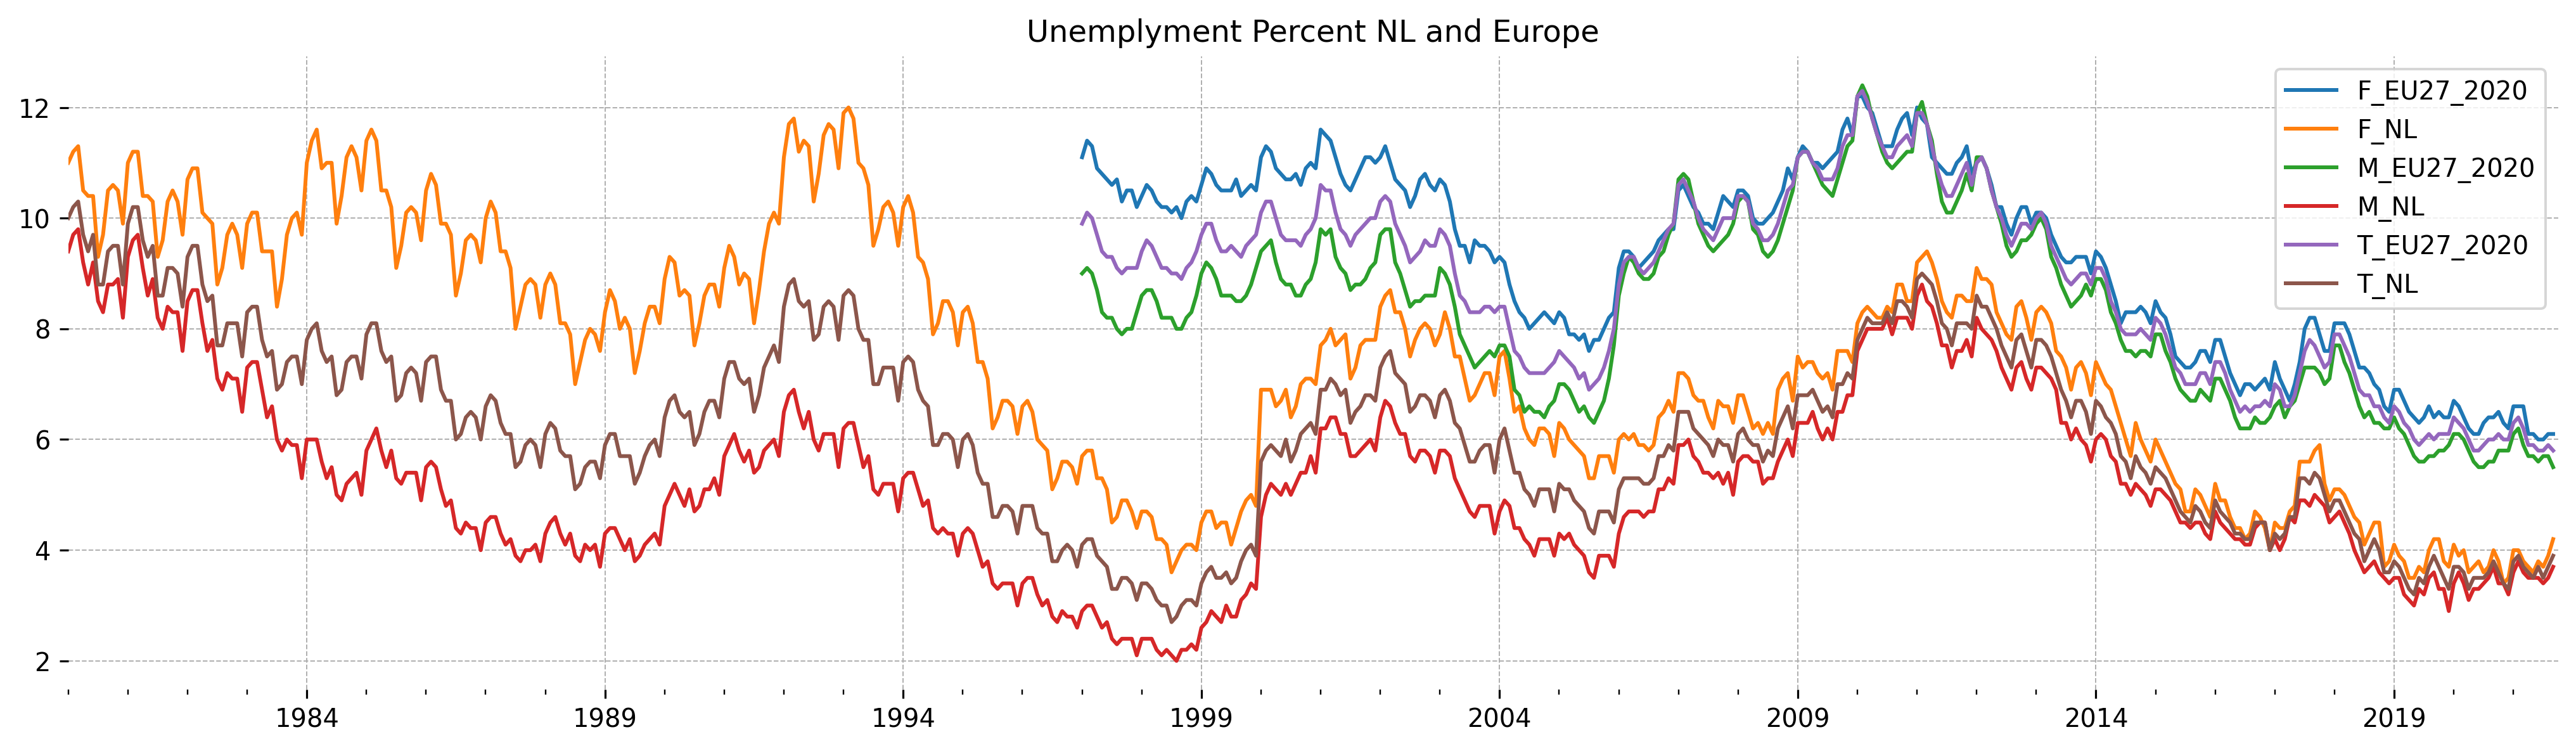

In [11]:
data = data.T
data.columns = newColumns
data.index = pd.date_range("1980-01-01", periods=data.shape[0], freq="MS")
data.plot(title='Unemplyment Percent NL and Europe');

In [ ]:
import requests

url = 'https://api.dnb.nl/echo-api/helloworld'

response = requests.get(url, headers={'Ocp-Apim-Subscription-Key': '22705b2ed8d94fc3823a88079e890baf'})
print(response.text)

In [ ]:
# BOP https://www.dnb.nl/en/statistics/data-search/#/details/balance-of-payments-quarter/dataset/5b160938-6940-4a6e-89b1-fccc027194c6/resource/9df04bfa-aa59-44d1-8a5d-e92af5569c7a

url = 'https://api.dnb.nl/statisticsdata/v2024100101/balance-sheet-of-de-nederlandsche-bank-month-non-break-adjusted?page=1&pageSize=15360&sort=period asc'
response = requests.get(url, headers={'Ocp-Apim-Subscription-Key': '22705b2ed8d94fc3823a88079e890baf',})

response_dict = json.loads(response.text)
response_dict


In [ ]:

for i in response_dict:
    print("key: ", i, "val: ", response_dict[i])
    print("\n")

for key, value in response_dict.items() :
    print(key, '\n')

df1 = pd.DataFrame.from_dict(response_dict['records'])
df1.to_csv('../data/dnb.csv', index=False) 
#tests